## 1.1 Install Dependencies

In [ ]:
!pip install opencv-python matplotlib
!pip install tqdm

In [ ]:
!pip install tensorflow
!pip install tensorflow-gpu

In [ ]:
!pip show tensorflow

## 1.2 Import Dependencies

In [1]:
# Import standard dependencies
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Import tensorflow dependencies - Functional API
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 1.3 Set GPU Growth

In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
print(len(gpus))
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

1


## 1.4 Create Folder Structures

In [4]:
# Setup paths
path = "/kaggle/working/"
POS_PATH = os.path.join(path, 'data', 'positive')
NEG_PATH = os.path.join(path, 'data', 'negative')
ANC_PATH = os.path.join(path, 'data', 'anchor')

In [5]:
# Make the directories
os.makedirs(POS_PATH)
os.makedirs(NEG_PATH)
os.makedirs(ANC_PATH)

# 2. Collect Positives and Anchors

## 2.1 Extracting the dataset

In [6]:
import shutil

In [7]:
shutil.unpack_archive("/kaggle/input/life-in-the-wild/lfw.tgz","/kaggle/working/")
shutil.unpack_archive("/kaggle/input/facial-recognition/positive.tgz","/kaggle/working/")
shutil.unpack_archive("/kaggle/input/facial-recognition/anchor.tgz","/kaggle/working/")

In [8]:
# Move LFW Images to the following repository data/negative
for directory in os.listdir("/kaggle/working/lfw"):
    for file in os.listdir(os.path.join("/kaggle/working/lfw", directory)):
        EX_PATH = os.path.join("/kaggle/working/lfw", directory, file)
        NEW_PATH = os.path.join(NEG_PATH, file)
        os.replace(EX_PATH, NEW_PATH)

In [10]:
# Move Images to the following repository data/positive
for file in os.listdir("/kaggle/working/positive"):
        EX_PATH = os.path.join("/kaggle/working/positive",file)
        NEW_PATH = os.path.join(POS_PATH,file)
        os.replace(EX_PATH, NEW_PATH)

In [11]:
# Move Images to the following repository data/anchor
for file in os.listdir("/kaggle/working/anchor"):
        EX_PATH = os.path.join("/kaggle/working/anchor",file)
        NEW_PATH = os.path.join(ANC_PATH,file)
        os.replace(EX_PATH, NEW_PATH)

In [15]:
#checking the data
c1 = 0
c2 = 0
c3 = 0
for file in os.listdir("/kaggle/working/data/negative"):
    c1 += 1
for file in os.listdir("/kaggle/working/data/positive"):
    c2 += 1
for file in os.listdir("/kaggle/working/data/anchor"):
    c3 += 1
print("Negatives: {}    Positives: {}    Anchors: {}".format(c1,c2,c3))

Negatives: 13233    Positives: 300    Anchors: 318


## 2.2 Collect Positive and Anchor Classes

In [ ]:
# Import uuid library to generate unique image names
#import uuid

In [ ]:
'''# Establish a connection to the webcam
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()

    # Cut down frame to 250x250px
    frame = frame[120:120+250,200:200+250, :]

    # Collect anchors
    if cv2.waitKey(1) & 0XFF == ord('a'):
        # Create the unique file patha
        imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Write out anchor image
        cv2.imwrite(imgname, frame)

    # Collect positives
    if cv2.waitKey(1) & 0XFF == ord('p'):
        # Create the unique file path
        imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Write out positive image
        cv2.imwrite(imgname, frame)

    # Show image back to screen
    cv2.imshow('Image Collection', frame)

    # Breaking gracefully
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break

# Release the webcam
cap.release()
# Close the image show frame
cv2.destroyAllWindows()'''

# 2.x NEW - Data Augmentation

In [16]:
def data_aug(img):
    data = []
    for i in range(9):
        img = tf.image.stateless_random_brightness(img, max_delta=0.02, seed=(1,2))
        img = tf.image.stateless_random_contrast(img, lower=0.6, upper=1, seed=(1,3))
        # img = tf.image.stateless_random_crop(img, size=(20,20,3), seed=(1,2))
        img = tf.image.stateless_random_flip_left_right(img, seed=(np.random.randint(100),np.random.randint(100)))
        img = tf.image.stateless_random_jpeg_quality(img, min_jpeg_quality=90, max_jpeg_quality=100, seed=(np.random.randint(100),np.random.randint(100)))
        img = tf.image.stateless_random_saturation(img, lower=0.9,upper=1, seed=(np.random.randint(100),np.random.randint(100)))

        data.append(img)

    return data

In [18]:
import os
import uuid

In [19]:
for file_name in os.listdir(os.path.join(POS_PATH)):
    img_path = os.path.join(POS_PATH, file_name)
    img = cv2.imread(img_path)
    augmented_images = data_aug(img)

    for image in augmented_images:
        cv2.imwrite(os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1())), image.numpy())

In [20]:
for file_name in os.listdir(os.path.join(ANC_PATH)):
    img_path = os.path.join(ANC_PATH, file_name)
    img = cv2.imread(img_path)
    augmented_images = data_aug(img)

    for image in augmented_images:
       cv2.imwrite(os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1())), image.numpy())

In [21]:
count = 0
for file_name in os.listdir(os.path.join(POS_PATH)):
    count+=1
print("Total no of Positive images: ",count)

Total no of Positive images:  3000


In [22]:
count = 0
for file_name in os.listdir(os.path.join(ANC_PATH)):
    count+=1
print("Total no of Anchor images: ",count)

Total no of Anchor images:  3180


# 3. Load and Preprocess Images

## 3.1 Get Image Directories

In [23]:
anchor = tf.data.Dataset.list_files(ANC_PATH+'/*.jpg').take(3000)
positive = tf.data.Dataset.list_files(POS_PATH+'/*.jpg').take(3000)
negative = tf.data.Dataset.list_files(NEG_PATH+'/*.jpg').take(3000)

In [24]:
dir_test = anchor.as_numpy_iterator()

## 3.2 Preprocessing - Scale and Resize

In [25]:
def preprocess(file_path):

    # Read in image from file path
    byte_img = tf.io.read_file(file_path)
    # Load in the image
    img = tf.io.decode_jpeg(byte_img)

    # Preprocessing steps - resizing the image to be 100x100x3
    img = tf.image.resize(img, (105,105))
    # Scale image to be between 0 and 1
    img = img / 255.0

    # Return image
    return img

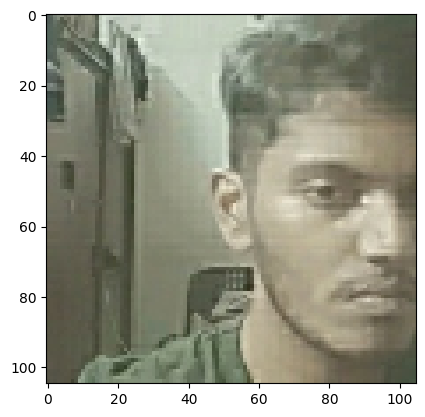

In [26]:
img = preprocess(dir_test.next())
plt.imshow(img)

## 3.3 Create Labelled Dataset

In [27]:
# (anchor, positive) => 1,1,1,1,1
# (anchor, negative) => 0,0,0,0,0

In [28]:
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positives.concatenate(negatives)

In [29]:
samples = data.as_numpy_iterator()

In [30]:
example = samples.next()

In [31]:
example

(b'/kaggle/working/data/anchor/c8f30e8e-857c-11ee-8b16-0242ac130202.jpg',
 b'/kaggle/working/data/positive/b98b6c34-857c-11ee-8b16-0242ac130202.jpg',
 1.0)

## 3.4 Build Train and Test Partition

In [32]:
def preprocess_twin(input_img, validation_img, label):
    return(preprocess(input_img), preprocess(validation_img), label)

In [33]:
res = preprocess_twin(*example)

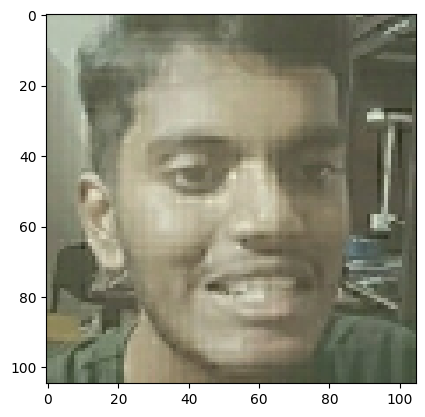

In [34]:
plt.imshow(res[0])

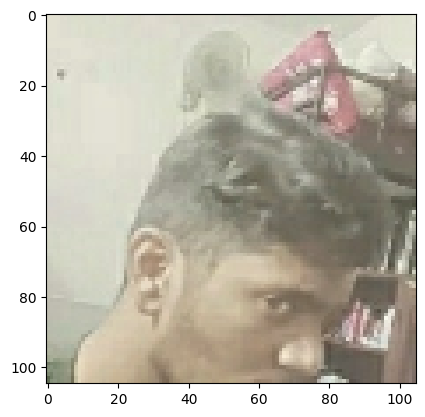

In [35]:
plt.imshow(res[1])

In [36]:
res[2]

1.0

In [37]:
# Build dataloader pipeline
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=1024)

In [38]:
# Training partition
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [39]:
# Testing partition
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

# 4. Model Engineering

## 4.1 Build Embedding Layer

In [40]:
def make_embedding():
    inp = Input(shape=(105,105,3), name='input_image')

    c1 = Conv2D(64, (10,10), activation='relu')(inp) # 1st convolution layer + ReLU
    m1 = MaxPooling2D(64, (2,2), padding='same')(c1) # 1st Max pooling layer

    # Second block
    c2 = Conv2D(128, (7,7), activation='relu')(m1) # 2nd convolution layer + ReLU
    m2 = MaxPooling2D(64, (2,2), padding='same')(c2) # 2nd Max pooling layer

    # Third block
    c3 = Conv2D(128, (4,4), activation='relu')(m2) # 3rd convolution layer + ReLU
    m3 = MaxPooling2D(64, (2,2), padding='same')(c3) # 3rd Max pooling layer

    # Final embedding block
    c4 = Conv2D(256, (4,4), activation='relu')(m3) # final convolution layer + ReLU
    f1 = Flatten()(c4) # flattening
    # fully connected layer
    d1 = Dense(4096, activation='sigmoid')(f1) # featured vector of size 4096 is obtained


    return Model(inputs=[inp], outputs=[d1], name='embedding')

In [41]:
embedding = make_embedding()

In [42]:
embedding.summary()

Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 105, 105, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 96, 96, 64)        19264     
                                                                 
 max_pooling2d (MaxPooling2  (None, 48, 48, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 42, 42, 128)       401536    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 21, 21, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 18, 18, 128)       26

## 4.2 Build Distance Layer

In [43]:
# Siamese L1 Distance class
class L1Dist(Layer):

    # Init method - inheritance
    def __init__(self, **kwargs):
        super().__init__()

    # Magic happens here - similarity calculation
    def call(self, input_embedding, validation_embedding):
        return tf.math.abs(input_embedding - validation_embedding)

## 4.3 Make Siamese Model

In [44]:
def make_siamese_model():

    # Anchor image input in the network
    input_image = Input(name='input_img', shape=(105,105,3))

    # Validation image in the network
    validation_image = Input(name='validation_img', shape=(105,105,3))

    # Combine siamese distance components
    siamese_layer = L1Dist()
    siamese_layer._name = 'distance'
    distances = siamese_layer(embedding(input_image), embedding(validation_image))

    # Classification layer
    classifier = Dense(1, activation='sigmoid')(distances)

    return Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [45]:
siamese_model = make_siamese_model()

In [46]:
siamese_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_img (InputLayer)      [(None, 105, 105, 3)]        0         []                            
                                                                                                  
 validation_img (InputLayer  [(None, 105, 105, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 embedding (Functional)      (None, 4096)                 3896044   ['input_img[0][0]',           
                                                          8          'validation_img[0][0]']      
                                                                                     

# 5. Training

## 5.1 Setup Loss and Optimizer

In [47]:
binary_cross_loss = tf.losses.BinaryCrossentropy()

In [48]:
opt = tf.keras.optimizers.Adam(1e-4) # 0.0001

## 5.2 Establish Checkpoints

In [52]:
CHK_PATH = os.path.join(path,'checkpoints')
os.makedirs(CHK_PATH)

In [ ]:
checkpoint_dir = "/kaggle/working/checkpoints"
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint = tf.train.Checkpoint(opt=opt, siamese_model=siamese_model)

## 5.3 Build Train Step Function

In [53]:
@tf.function
def train_step(batch):

    # Record all of our operations
    with tf.GradientTape() as tape:
        # Get anchor and positive/negative image
        X = batch[:2]
        # Get label
        y = batch[2]

        # Forward pass
        yhat = siamese_model(X, training=True)
        # Calculate loss
        loss = binary_cross_loss(y, yhat)
    print(loss)

    # Calculate gradients
    grad = tape.gradient(loss, siamese_model.trainable_variables)

    # Calculate updated weights and apply to siamese model
    opt.apply_gradients(zip(grad, siamese_model.trainable_variables))

    # Return loss
    return loss

## 5.4 Build Training Loop

In [54]:
# Import metric calculations
from tensorflow.keras.metrics import Precision, Recall
from tqdm import tqdm

In [66]:
def train(data, EPOCHS):
    # Loop through epochs
    for epoch in range(1, EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch, EPOCHS))
        progressbar = tf.keras.utils.Progbar(len(data))

        # Creating a metric object
        r = Recall()
        p = Precision()

        # Loop through each batch
        for idx, batch in enumerate(data):
            # Run train step here
            loss = train_step(batch)
            yhat = siamese_model.predict(batch[:2])
            r.update_state(batch[2], yhat)
            p.update_state(batch[2], yhat)
            progressbar.update(idx+1)
        print("Loss: ",loss.numpy()," Recall: ", r.result().numpy()," Precision: ", p.result().numpy())

    '''#Save checkpoints
        if epoch % 10 == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)'''

## 5.5 Train the model

In [67]:
EPOCHS = 10

In [68]:
train(train_data, EPOCHS)


 Epoch 1/10
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
263/263 [==============================] - 66s 210ms/step
Loss:  0.2797913  Recall:  0.86052173  Precision:  0.9728667

 Epoch 2/10
263/263 [==============================] - 53s 199ms/step
Loss:  0.15143155  Recall:  0.91753656  Precision:  0.97775304

 Epoch 3/10
263/263 [==============================] - 52s 194ms/step
Loss:  0.016198574  Recall:  0.9708232  Precision:  0.98728365

 Epoch 4/10
263/263 [==============================] - 49s 183ms/step
Loss:  0.24300094  Recall:  0.975026  Precision:  0.9808095

 Epoch 5/10
263/263 [==============================] - 48s 180ms/step
Loss:  0.0689165  Recall:  0.98715276  Precision:  0.98339677

 Epoch 6/10
263/263 [==============================] - 47s 178ms/step
Loss:  0.06534023  Recall:  0.9854217  Precision:  0.9867918

 Epoch 7/10
263/263 [============================

# 6. Evaluate Model

## 6.1 Import Metrics

In [69]:
# Import metric calculations
from tensorflow.keras.metrics import Precision, Recall

## 6.2 Make Predictions

In [70]:
# Get a batch of test data
test_input, test_val, y_true = test_data.as_numpy_iterator().next()

In [71]:
y_hat = siamese_model.predict([test_input, test_val])

1/1 [==============================] - 0s 22ms/step


In [72]:
# Post processing the results
[1 if prediction > 0.5 else 0 for prediction in y_hat ]

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [73]:
y_true

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

## 6.3 Calculate Metrics

In [75]:
# Creating a metric object
m = Recall()

# Calculating the recall value
m.update_state(y_true, y_hat)

# Return Recall Result
print("Recall")
m.result().numpy()

Recall


1.0

In [76]:
# Creating a metric object
m = Precision()

# Calculating the precision value
m.update_state(y_true, y_hat)

# Return percision Result
print("Precision")
m.result().numpy()

Precision


1.0

In [77]:
r = Recall()
p = Precision()

for test_input, test_val, y_true in test_data.as_numpy_iterator():
    yhat = siamese_model.predict([test_input, test_val])
    r.update_state(y_true, yhat)
    p.update_state(y_true,yhat)

print(r.result().numpy(), p.result().numpy())

1/1 [==============================] - 0s 20ms/step
0.73913044 0.8854167


## 6.4 Viz Results

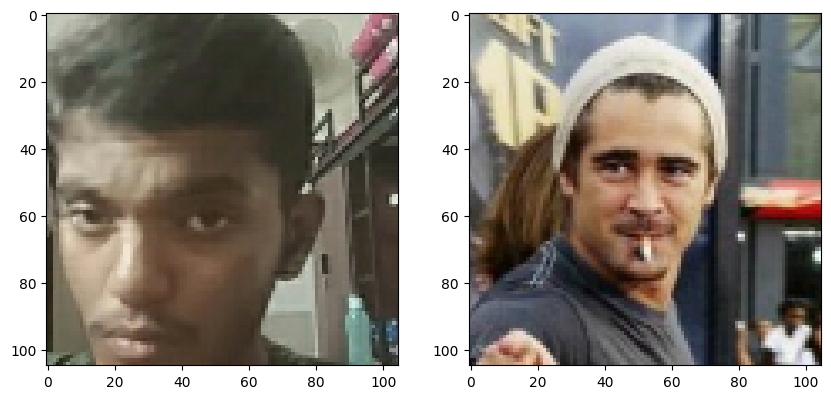

False


In [78]:
# Set plot size
plt.figure(figsize=(10,8))

# Set first subplot
plt.subplot(1,2,1)
plt.imshow(test_input[0])

# Set second subplot
plt.subplot(1,2,2)
plt.imshow(test_val[0])

# Renders cleanly
plt.show()
if yhat[0] >= 0.5:
  print("True")
else:
  print("False")

# 7. Save Model

In [79]:
# Save weights
siamese_model.save('siamesemodelv2.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
L1Dist

In [ ]:
# Reload model
siamese_model = tf.keras.models.load_model('siamesemodelv2.h5',
                                   custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [ ]:
# Make predictions with reloaded model
siamese_model.predict([test_input, test_val])

In [ ]:
# View model summary
siamese_model.summary()

# 8. Real Time Test

## 8.1 Verification Function

In [ ]:
application_data\verification_images

In [ ]:
os.listdir(os.path.join('application_data', 'verification_images'))

In [ ]:
os.path.join('application_data', 'input_image', 'input_image.jpg')

In [ ]:
for image in os.listdir(os.path.join('application_data', 'verification_images')):
    validation_img = os.path.join('application_data', 'verification_images', image)
    print(validation_img)

In [ ]:
def verify(model, detection_threshold, verification_threshold):
    # Build results array
    results = []
    for image in os.listdir(os.path.join('application_data', 'verification_images')):
        input_img = preprocess(os.path.join('application_data', 'input_image', 'input_image.jpg'))
        validation_img = preprocess(os.path.join('application_data', 'verification_images', image))

        # Make Predictions
        result = model.predict(list(np.expand_dims([input_img, validation_img], axis=1)))
        results.append(result)

    # Detection Threshold: Metric above which a prediciton is considered positive
    detection = np.sum(np.array(results) > detection_threshold)

    # Verification Threshold: Proportion of positive predictions / total positive samples
    verification = detection / len(os.listdir(os.path.join('application_data', 'verification_images')))
    verified = verification > verification_threshold

    return results, verified

## 8.2 OpenCV Real Time Verification

In [ ]:
cap = cv2.VideoCapture(4)
while cap.isOpened():
    ret, frame = cap.read()
    frame = frame[120:120+250,200:200+250, :]

    cv2.imshow('Verification', frame)

    # Verification trigger
    if cv2.waitKey(10) & 0xFF == ord('v'):
        # Save input image to application_data/input_image folder
#         hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
#         h, s, v = cv2.split(hsv)

#         lim = 255 - 10
#         v[v > lim] = 255
#         v[v <= lim] -= 10

#         final_hsv = cv2.merge((h, s, v))
#         img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)

        cv2.imwrite(os.path.join('application_data', 'input_image', 'input_image.jpg'), frame)
        # Run verification
        results, verified = verify(siamese_model, 0.5, 0.5)
        print(verified)

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [ ]:
np.sum(np.squeeze(results) > 0.9)

In [ ]:
results